In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv("data/train.csv")

In [3]:
display(raw_data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Cleaning Missing Values

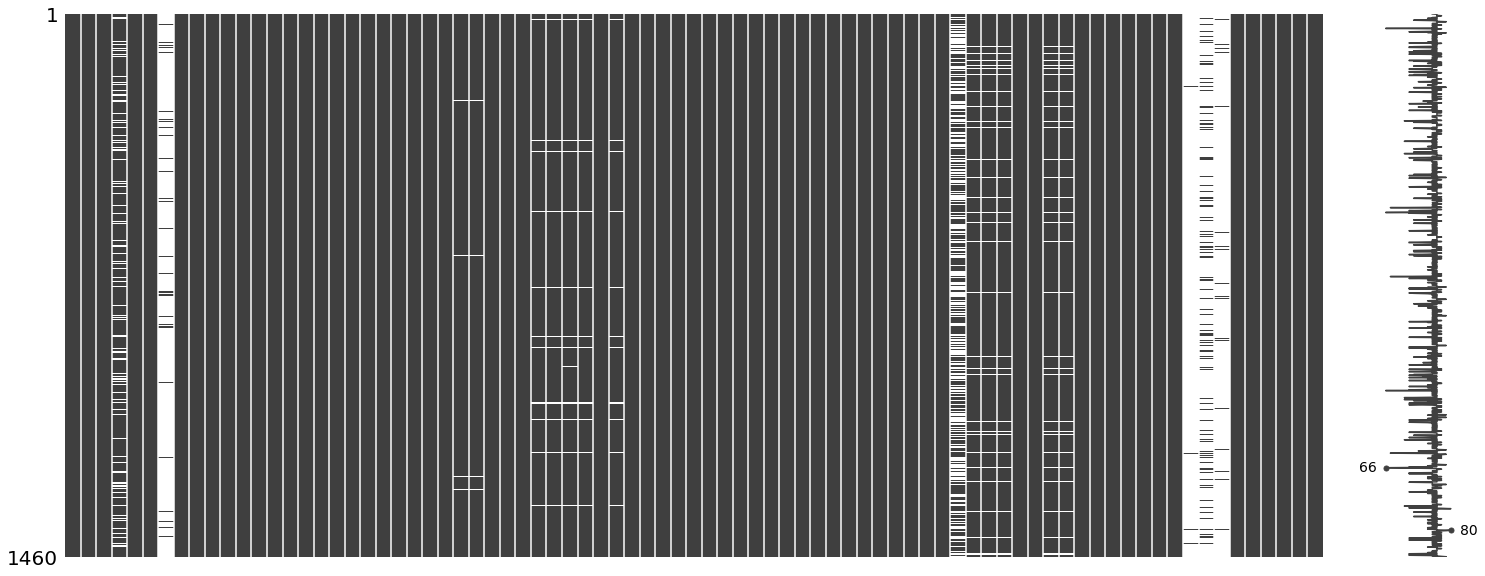

In [4]:
msno.matrix(raw_data)
plt.show()

In [5]:
#from looking at the matrix 5 columns have many missing values

missing = raw_data.isnull().sum().sort_values(ascending=False).head(20)
print("Missing values percentage")
display(missing/raw_data.shape[0])

Missing values percentage


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

In [6]:
#Deep Copy the dataset
#Delete the 5 columns with more than 20% missing data and the 'id' column

pre_data = raw_data.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1).copy()
print("Missing values")
pre_data.isnull().sum().sort_values(ascending=False).head(15)

Missing values


LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageCond       81
GarageQual       81
GarageFinish     81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
Exterior1st       0
dtype: int64

In [7]:
pre_data['LotFrontage'].fillna(0,inplace=True)
pre_data['GarageType'].fillna('NAN',inplace=True)
pre_data['GarageCond'].fillna('NAN',inplace=True)
pre_data['GarageQual'].fillna('NAN',inplace=True)
pre_data['GarageFinish'].fillna('NAN',inplace=True)
pre_data['GarageYrBlt'][pre_data['GarageYrBlt'].isnull()]=pre_data['YearBuilt']
pre_data['BsmtExposure'].fillna('NAN',inplace=True)
pre_data['BsmtFinType1'].fillna('NAN',inplace=True)
pre_data['BsmtFinType2'].fillna('NAN',inplace=True)
pre_data['BsmtCond'].fillna('NAN',inplace=True)
pre_data['BsmtQual'].fillna('NAN',inplace=True)
pre_data['MasVnrType'].fillna('NAN',inplace=True)
pre_data['MasVnrArea'].fillna(0,inplace=True)
pre_data['Electrical'].fillna('SBrkr',inplace=True)

In [8]:
print("Number of Missing values")
pre_data.isnull().sum().sum()

Number of Missing values


0

# Outlier Removal

# Converting

In [9]:
pd.set_option('display.max_rows', 100)
from sklearn.preprocessing import LabelEncoder

pre_data['OverallQual'] = pre_data['GarageYrBlt'].astype(str)
pre_data['MSSubClass'] = pre_data['MSSubClass'].apply(str)
pre_data['OverallCond'] = pre_data['OverallCond'].astype(str)
pre_data['YrSold'] = pre_data['YrSold'].astype(str)
pre_data['MoSold'] = pre_data['MoSold'].astype(str)
pre_data['YearBuilt'] = pre_data['YearBuilt'].astype(str)
pre_data['YearRemodAdd'] = pre_data['YearRemodAdd'].astype(str)
pre_data['YearBuilt'] = pre_data['YearBuilt'].astype(str)
pre_data['YearRemodAdd'] = pre_data['YearRemodAdd'].astype(str)
pre_data['GarageYrBlt'] = pre_data['GarageYrBlt'].astype(str)

#Label encoding all categorical features
categorical_cols = pre_data.dtypes[pre_data.dtypes==object].index.to_list()
for c in categorical_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(pre_data[c].values)) 
    pre_data[c] = lbl.transform(list(pre_data[c].values))


In [10]:
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
# Three different types of correlation

# Exploratory Analysis

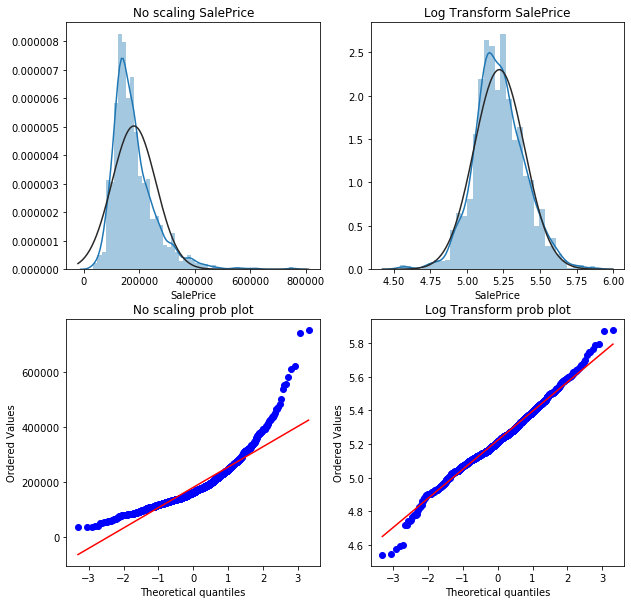

In [11]:
# train_data = pre_data
from scipy.stats import norm
from scipy import stats

train_data=pre_data

fig, axs = plt.subplots(2, 2,figsize=(10, 10))

sns.distplot(train_data['SalePrice'],fit=stats.norm,ax=axs[0,0])
axs[0,0].set_title('No scaling SalePrice')

sns.distplot(np.log10(train_data['SalePrice']),fit=stats.norm,ax=axs[0,1])
axs[0,1].set_title('Log Transform SalePrice')

stats.probplot((train_data['SalePrice']), plot=axs[1,0])
axs[1,0].set_title('No scaling prob plot')

stats.probplot(np.log10(train_data['SalePrice']), plot=axs[1,1])
axs[1,1].set_title('Log Transform prob plot')
plt.show()
#Log transformation Normalizes SalesPrice

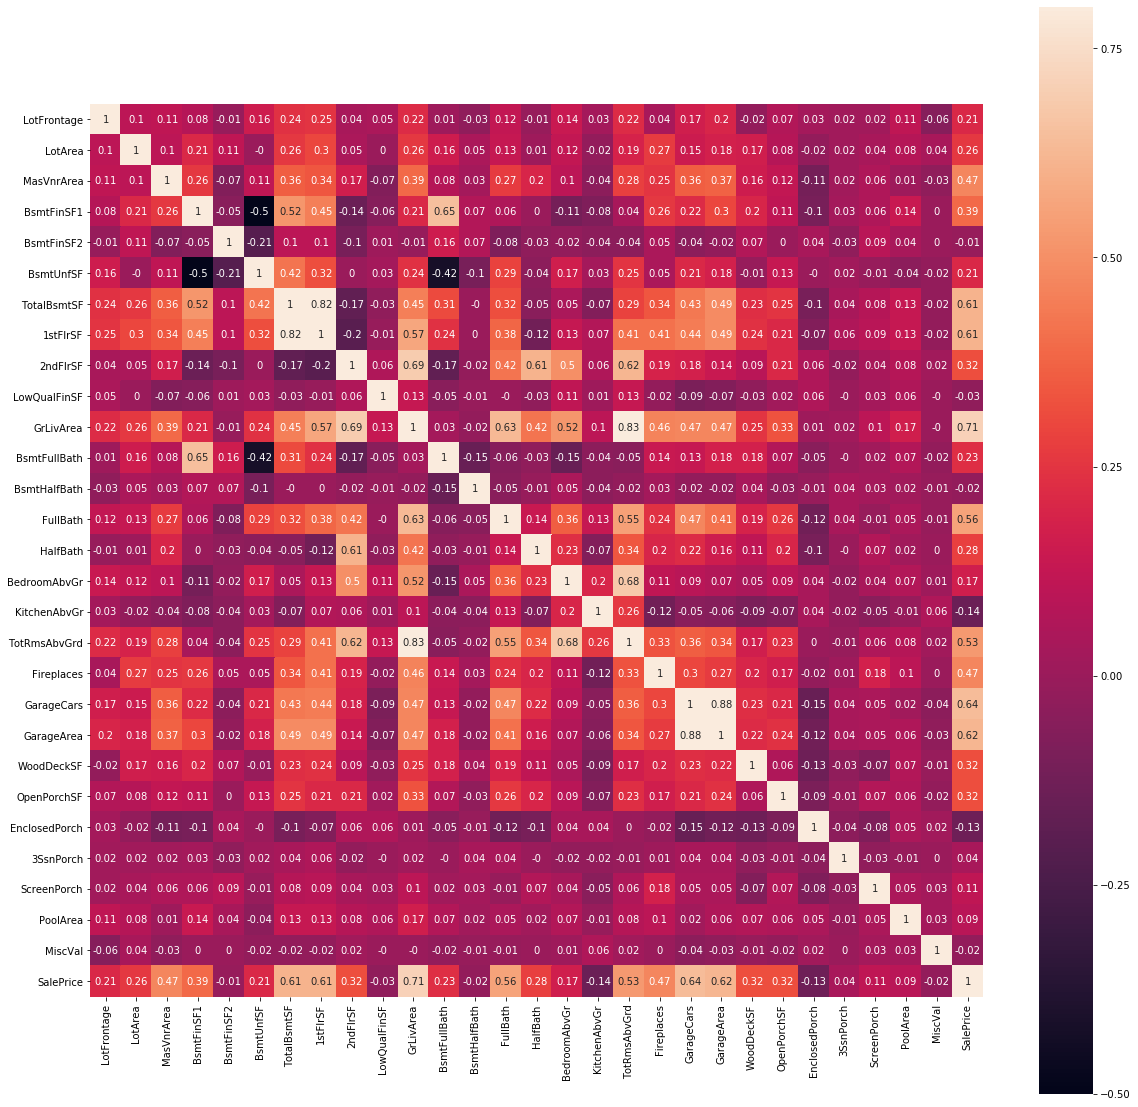

In [12]:
#Correlation matrix of numerical Values
corr_mat = pre_data.drop(categorical_cols,axis=1).corr().round(2)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_mat, vmax=.8, square=True,annot=True);

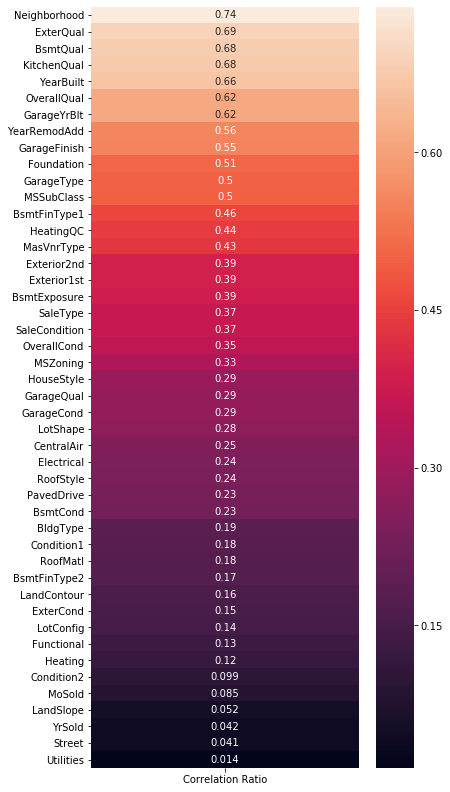

In [22]:
from ds_utils import correlations as cors

#Correlation between continouos variable sales price and categorical values
categories = pre_data[categorical_cols]
measurements = pre_data['SalePrice']
eta = cors.correlation_ratio(categories, measurements).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 14))
sns.heatmap(pd.DataFrame(eta), annot=True)
plt.show()

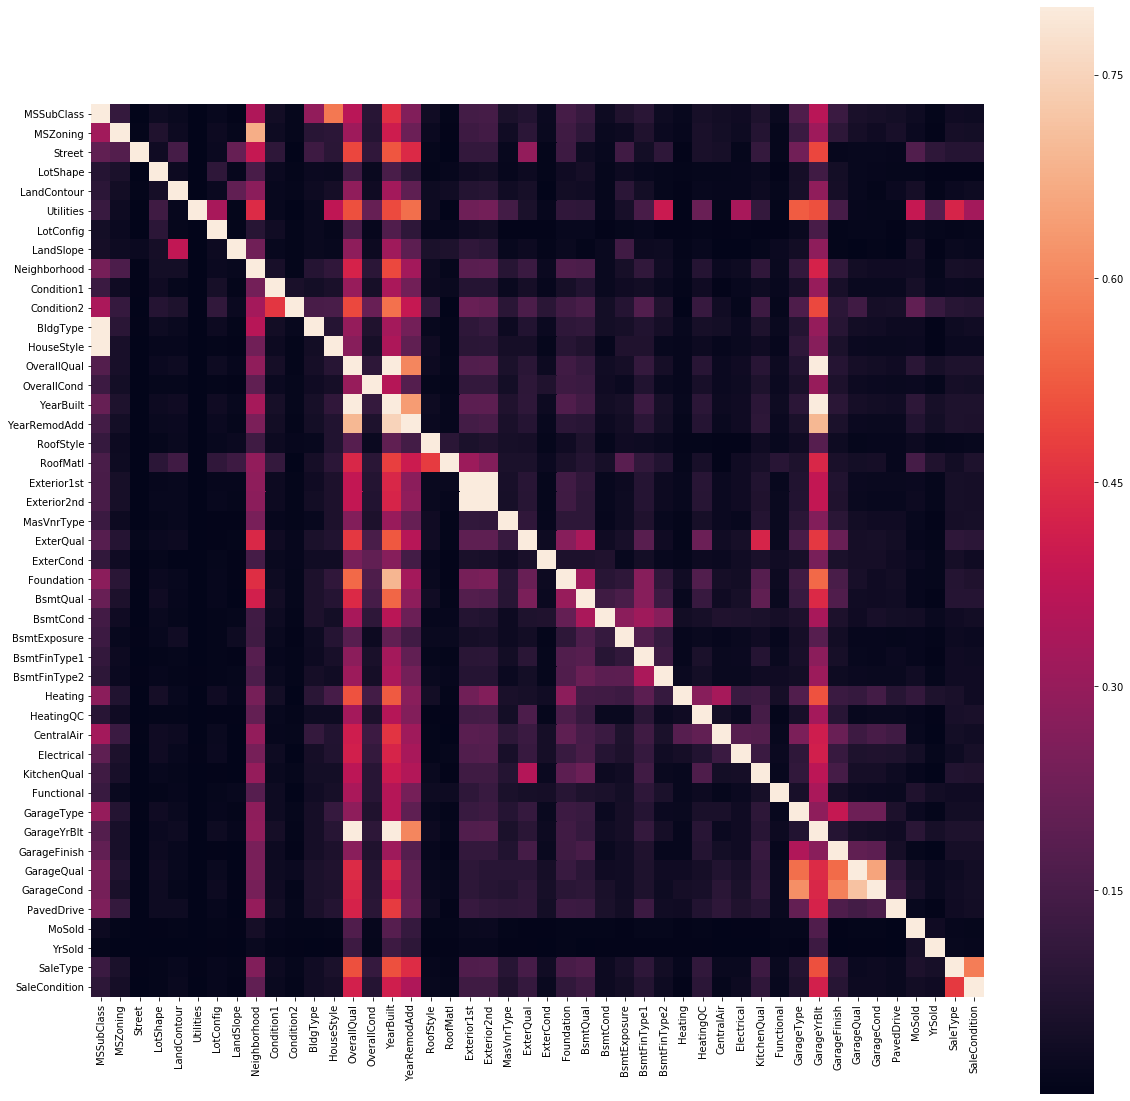

In [18]:
#Thiels correlation between categorical features
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(cors.theils_u(pre_data[categorical_cols]), vmax=.8, square=True);
plt.show()

# Feature enginnering

In [56]:
train_data['TotalHouseArea'] = train_data['GrLivArea']+train_data['TotalBsmtSF']+train_data['GarageArea']
train_data['TotalBath'] = train_data['HalfBath']+train_data['FullBath'] + train_data['BsmtFullBath'] + train_data['BsmtHalfBath']

corr_mat = train_data.corr()
top_10 = corr_mat['SalePrice'].abs().sort_values(ascending=False).head(10).index.to_list()

# Model Building

In [58]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_log_error


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

top_10.append('SalePrice')
feature_data = train_data#[top_10]

X = feature_data.drop(['SalePrice'],axis=1).values
y = feature_data.SalePrice.values



print('\nShuffle split')
ss = ShuffleSplit(n_splits=1, random_state=0, test_size=0.2, train_size=0.8)
avg_acc=[]
for train_index, test_index in ss.split(X):
    xTrain, yTrain = X[train_index] , y[train_index]
    xTest, yTest = X[test_index] , y[test_index]
    
    clf = LinearRegression().fit(xTrain, yTrain)
    train_predictions = clf.predict(xTest)
    acc = np.sqrt(mean_squared_log_error(yTest, train_predictions))
    avg_acc.append(acc)
    print('Acc '+ str(round(acc,4)))
print('\nAVG RMSLE '+ str(round(np.mean(avg_acc),5)))


# y_train_pred = clf.predict(xTrain)
# y_test_pred = clf.predict(xTest)


Shuffle split


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.